**INSTALLING REQUIRED MODULES**

In [3]:
pip install mysql-connector-python

     ---------------------------------------- 14.3/14.3 MB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


**IMPORTS**

In [1]:
import mysql.connector
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**ESTABLISHING CONNECTION TO MySql DATABASE**

In [2]:
conn = mysql.connector.connect(host="localhost", user="root", password="Arpit_Mohanty@28012003", database="arpit")
cursor = conn.cursor()

**QUERIES & DATA VISUALIZATION**

***Find the total sales per category***


In [46]:
query = '''

Select product_category category,sum(payment_value) sales from order_items o join products p on o.product_id = p.product_id join payments a on o.order_id = a.order_id group by category


'''

                       Category         Sales
0                     perfumery  5.067387e+05
1          Furniture Decoration  1.430176e+06
2                     telephony  4.868821e+05
3                bed table bath  1.712554e+06
4                    automotive  8.522943e+05
..                          ...           ...
69               cds music dvds  1.199430e+03
70                   La Cuisine  2.913530e+03
71  Fashion Children's Clothing  7.856700e+02
72                     PC Gamer  2.174430e+03
73       insurance and services  3.245100e+02

[74 rows x 2 columns]


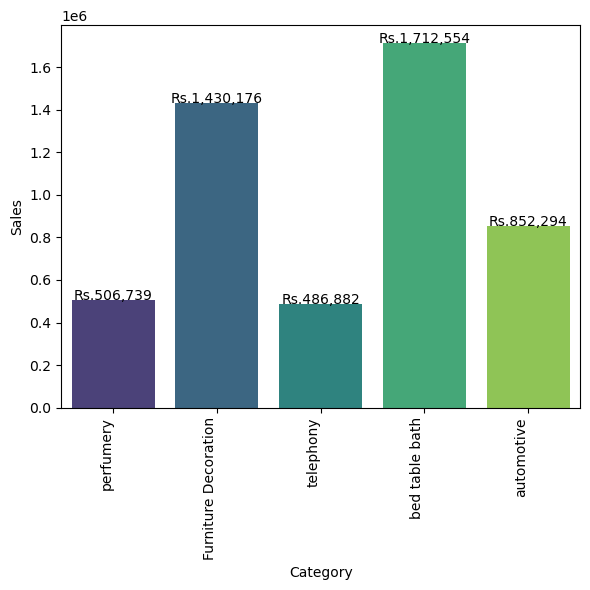

In [50]:

cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data,columns = ["Category","Sales"])
print(df)

df = df.head()

plt.figure(figsize=(6, 6))
sns.barplot(x='Category', y='Sales', data=df, palette='viridis')

plt.xticks(rotation=90, ha='right')

for index, value in enumerate(df['Sales']):
    plt.text(index, value + 500, f'Rs.{value:,.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()



**OBSERVATIONS:<br><br>
1.The top categories (Bed Table Bath, Furniture Decoration) dominate the sales, indicating strong consumer demand in these areas.<br>
2.Categories like Perfumery and Telephony have moderate sales, suggesting steady demand.<br>
3.Categories with very low sales, such as Insurance and Services and CDs Music DVDs, may indicate niche markets or declining trends.**

***Count the number of customers from each state.***

In [51]:
query = '''

select customer_state, count(customer_id) customer_number from customers group by customer_state

'''

   State  Customer_count
0     SP           41746
1     SC            3637
2     MG           11635
3     PR            5045
4     RJ           12852
5     RS            5466
6     PA             975
7     GO            2020
8     ES            2033
9     BA            3380
10    MA             747
11    MS             715
12    CE            1336
13    DF            2140
14    RN             485
15    PE            1652
16    MT             907
17    AM             148
18    AP              68
19    AL             413
20    RO             253
21    PB             536
22    TO             280
23    PI             495
24    AC              81
25    SE             350
26    RR              46


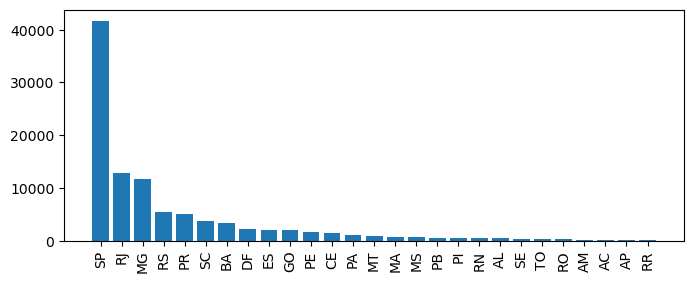

In [52]:
cursor.execute(query)
data = cursor.fetchall()



df = pd.DataFrame(data, columns = ["State","Customer_count"])
print(df)
df = df.sort_values(by="Customer_count",ascending=False)
plt.figure(figsize=(8,3))
plt.bar(df["State"], df["Customer_count"])
plt.xticks(rotation=90)
plt.show()


**OBSERVATIONS:<br><br>
1.A significant concentration of sales is seen in SP, which indicates a possible market dominance or higher demand in this category.<br>
2.North Region (PA, AM, AP, RO, AC, RR): Generally lower sales, with PA being the highest in the North.<br>
3.Northeast Region (BA, MA, CE, PE, RN, PB, PI, AL, SE): Lower sales compared to the Southeast and South, with varying performance among states.<br>
4.outheast Region (SP, RJ, MG, ES): Dominates sales, especially SP with a huge lead.<br>
5.RR (Roraima): The lowest sales with just 46 units.**

***Calculate the number of orders per month in 2018.***



In [28]:
query = '''

select month_name, count(*) as monthly_count from(select *, monthname(order_purchase_timestamp) as month_name from orders where order_purchase_timestamp like '2018%') as subquery_alias group by month_name


'''


       Month  Customer_Count
0       July            6292
1     August            6512
2   February            6728
3       June            6167
4      March            7211
5    January            7269
6        May            6873
7      April            6939
8  September              16
9    October               4


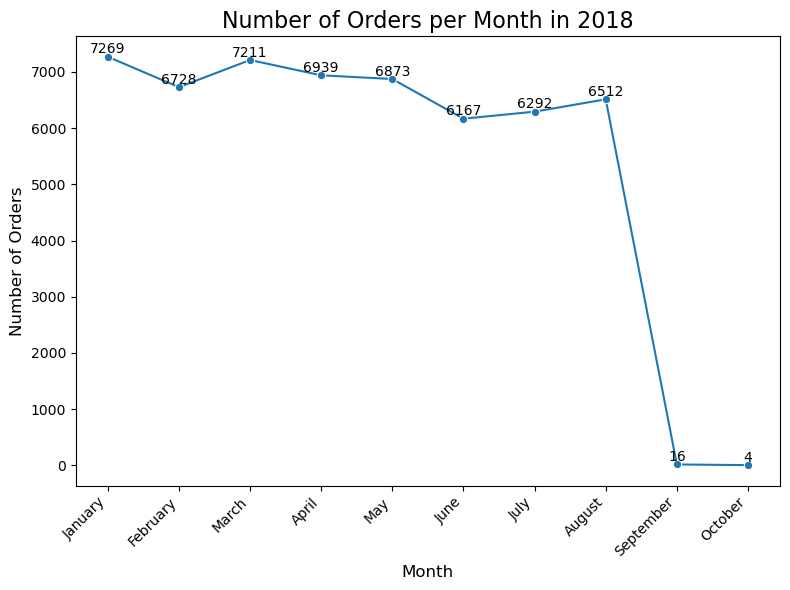

In [33]:
cursor.execute(query)
data = cursor.fetchall()

# print(data)
df = pd.DataFrame(data, columns = ["Month","Customer_Count"])
print(df)

df['Month'] = pd.Categorical(df['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
df = df.sort_values('Month')


plt.figure(figsize=(8, 6))


sns.lineplot(x='Month', y='Customer_Count', data=df, marker='o', palette='viridis')


plt.title('Number of Orders per Month in 2018', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)


plt.xticks(rotation=45, ha='right')


for index, row in df.iterrows():
    plt.text(row['Month'], row['Customer_Count'] + 5, row['Customer_Count'], 
             ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

**Observations:<br><br>
1.January and March have the highest number of orders, with 7269 and 7211 orders respectively.<br>
2.February, May, April, July, and August also show relatively high customer counts.<br>
3.Fall months (September and October) have an unusually low number of orders.<br>
4.Spring and Summer months (March to August) generally show higher customer counts.**

***Find the average number of products per order, grouped by customer city***

In [53]:
query = '''

select customer_city, round(avg(oii),2) from customers c join orders o on c.customer_id = o.customer_id join (select order_id,count(order_item_id) as oii from order_items group by order_id) as alias_subquery on o.order_id = alias_subquery.order_id group by customer_city


'''


In [56]:
cursor.execute(query)
data = cursor.fetchall()

# print(data)
df = pd.DataFrame(data, columns = ["Customer_city","Avg_num_of_product per order"])
print(df)

               Customer_city Avg_num_of_product per order
0                   anapolis                         1.13
1                  sao paulo                         1.16
2                   brasilia                         1.13
3             belo horizonte                         1.14
4                lagoa santa                         1.12
...                      ...                          ...
4105               garruchos                         1.00
4106      humberto de campos                         1.00
4107  bela vista do maranhao                         1.00
4108              cantanhede                         1.00
4109      tabuleiro do norte                         1.00

[4110 rows x 2 columns]


***List all Unique Cities Where Customers are Located***


In [57]:
query = '''

select distinct customer_city from customers


'''


In [58]:
cursor.execute(query)
data = cursor.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

***Calculate the moving average of order values for each customer over their order history.***

In [87]:
query = '''

select customer_id,payment_value,avg(payment_value) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as moving_avg from (select o.customer_id,o.order_purchase_timestamp,p.payment_value from orders o join payments p on o.order_id = p.order_id) alias_subquery


'''

In [88]:
cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data, columns = ["Customer_id","Revenue","Moving Avg over 3 rows"])
df = df.head()
print(df)

                        Customer_id  Revenue  Moving Avg over 3 rows
0  00012a2ce6f8dcda20d059ce98491703   114.74              114.739998
1  000161a058600d5901f007fab4c27140    67.41               67.410004
2  0001fd6190edaaf884bcaf3d49edf079   195.42              195.419998
3  0002414f95344307404f0ace7a26f1d5   179.35              179.350006
4  000379cdec625522490c315e70c7a9fb   107.01              107.010002


***Identify the top 3 customers who spent the most money in each year.***


In [61]:
query = '''


select order_year,customer_id,pay_sum,d_rank from (select order_year,customer_id,pay_sum,dense_rank() over(partition by order_year  order by pay_sum desc) d_rank from (select year(orders.order_purchase_timestamp) as order_year,orders.customer_id,sum(payments.payment_value) as pay_sum from orders join payments on orders.order_id = payments.order_id group by order_year,orders.customer_id order by order_year,orders.customer_id) as a) as p where d_rank <=3


'''

   Year                       Customer_id         Sales  Rank
0  2016  a9dc96b027d1252bbac0a9b72d837fc6   1423.550049     1
1  2016  1d34ed25963d5aae4cf3d7f3a4cda173   1400.739990     2
2  2016  4a06381959b6670756de02e07b83815f   1227.780029     3
3  2017  1617b1357756262bfa56ab541c47bc16  13664.080078     1
4  2017  c6e2731c5b391845f6800c97401a43a9   6929.310059     2
5  2017  3fd6777bbce08a352fddd04e4a7cc8f6   6726.660156     3
6  2018  ec5b2ba62e574342386871631fafd3fc   7274.879883     1
7  2018  f48d464a0baaea338cb25f816991ab1f   6922.209961     2
8  2018  e0a2412720e9ea4f26c1ac985f6a7358   4809.439941     3


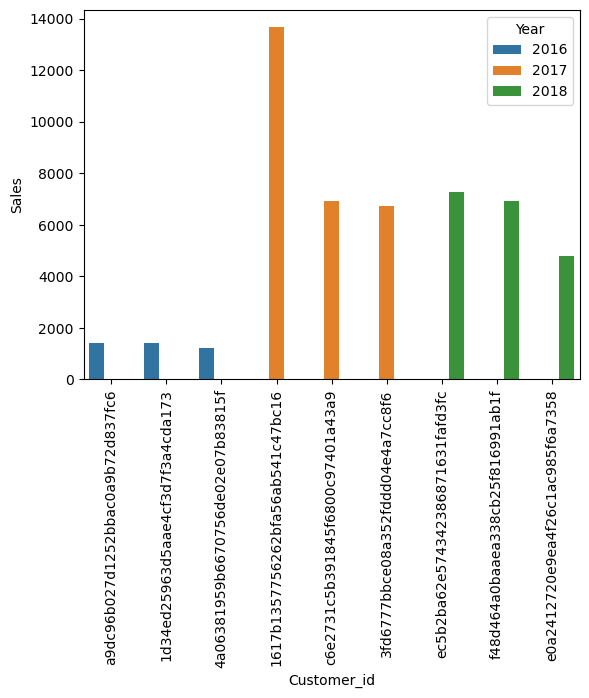

In [62]:
cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data, columns = ["Year","Customer_id","Sales","Rank"])
print(df)
sns.barplot(x = "Customer_id", y = "Sales", data=df, hue="Year")
plt.xticks(rotation=90)
plt.show()

***Identify Retation Rate of Customers over 6 months.***

In [63]:
query = '''

with alias_subquery as (select orders.customer_id, min(orders.order_purchase_timestamp) as first_order from orders group by orders.customer_id),
b as (select alias_subquery.customer_id, count(distinct orders.order_purchase_timestamp) as retention_count from alias_subquery join orders on alias_subquery.customer_id = orders.customer_id and orders.order_purchase_timestamp > alias_subquery.first_order and orders.order_purchase_timestamp < date_add(alias_subquery.first_order,interval 6 month) group by alias_subquery.customer_id)

select round(100*(count(b.customer_id)/count(alias_subquery.customer_id)),2) customer_retention_percent from alias_subquery left join b on alias_subquery.customer_id = b.customer_id


'''

In [64]:
cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data, columns = ["Customer Rtetention Rate"])
print(df)


  Customer Rtetention Rate
0                     0.00


**Result:<br>
There are no retained customers over a period of 6 months**

***Identify the correlation between product price and the number of times a product has been purchased***

In [98]:
query = '''


select product_category,count(oi.product_id),round(avg(oi.price),2) from products p join order_items oi on p.product_id = oi.product_id group by product_category


'''

In [101]:
cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data, columns = ["Product_Category","Product Count","Product Price"])
print(df)
arr1 = df["Product Count"]
arr2 = df["Product Price"]

corr = np.corrcoef([arr1,arr2])
print(f"The correlation coff between Product Count & Porduct Price is {corr[0][1]}")

                   Product_Category  Product Count  Product Price
0                     HEALTH BEAUTY           9670         130.16
1                     sport leisure           8641         114.34
2                        Cool Stuff           3796         167.36
3              computer accessories           7827         116.51
4                   Watches present           5991         201.14
..                              ...            ...            ...
69                          flowers             33          33.64
70  Kitchen portable and food coach             15         264.57
71                  House Comfort 2             30          25.34
72       CITTE AND UPHACK FURNITURE             38         114.95
73                   cds music dvds             14          52.14

[74 rows x 3 columns]
The correlation coff between Product Count & Porduct Price is -0.10631514167157562


**The correlation coff between Product Count & Porduct Price is -0.10631514167157562.<br>
It signifies that there is no corelation between price of the product and number of products purchased.**


***Calculate the total revenue generated by each seller, and rank them by revenue.***


In [67]:
query = '''


with a as (select seller_id,round(sum(p.payment_value),2) sum_total from order_items o join payments p on o.order_id = p.order_id group by seller_id)
select *,dense_rank() over (order by sum_total desc) from a



'''

                          Seller_id    Revenue  Rank
0  7c67e1448b00f6e969d365cea6b010ab  507166.91     1
1  1025f0e2d44d7041d6cf58b6550e0bfa  308222.04     2
2  4a3ca9315b744ce9f8e9374361493884  301245.27     3
3  1f50f920176fa81dab994f9023523100  290253.42     4
4  53243585a1d6dc2643021fd1853d8905  284903.08     5


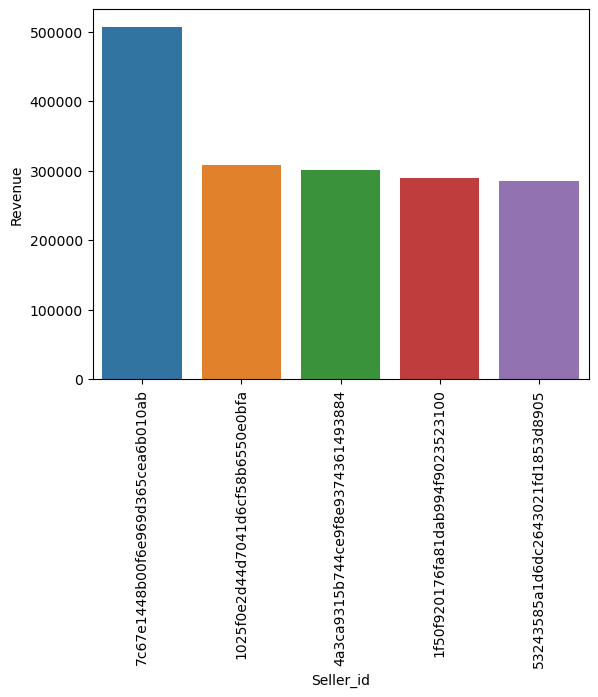

In [69]:
cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data, columns = ["Seller_id","Revenue","Rank"])
df = df.head()
print(df)
sns.barplot(x = df["Seller_id"], y = df["Revenue"],data=df)
plt.xticks(rotation=90)
plt.show()

**Result:<br>
Maximum Revenue is generated by seller with seller id 7c67e1448b00f6e969d365cea6b010ab**

***Calculate the cumulative sales per month for each year.***


In [91]:
query = '''


select order_year,order_month,pay_sum,sum(pay_sum) over(order by order_year,order_month) as cummilative_pay_sum from (select year(orders.order_purchase_timestamp) as order_year ,month(orders.order_purchase_timestamp) as order_month,sum(payments.payment_value) as pay_sum from orders join payments on orders.order_id = payments.order_id group by order_year,order_month order by order_year,order_month) as alias_subquery


'''

    Year  Month         Sales  Cummilative Sales per month per year
0   2016      9  2.522400e+02                          2.522400e+02
1   2016     10  5.909048e+04                          5.934272e+04
2   2016     12  1.962000e+01                          5.936234e+04
3   2017      1  1.384880e+05                          1.978504e+05
4   2017      2  2.919080e+05                          4.897584e+05
5   2017      3  4.498636e+05                          9.396220e+05
6   2017      4  4.177880e+05                          1.357410e+06
7   2017      5  5.929188e+05                          1.950329e+06
8   2017      6  5.112764e+05                          2.461605e+06
9   2017      7  5.923829e+05                          3.053988e+06
10  2017      8  6.743963e+05                          3.728384e+06
11  2017      9  7.277625e+05                          4.456147e+06
12  2017     10  7.796779e+05                          5.235825e+06
13  2017     11  1.194883e+06                   

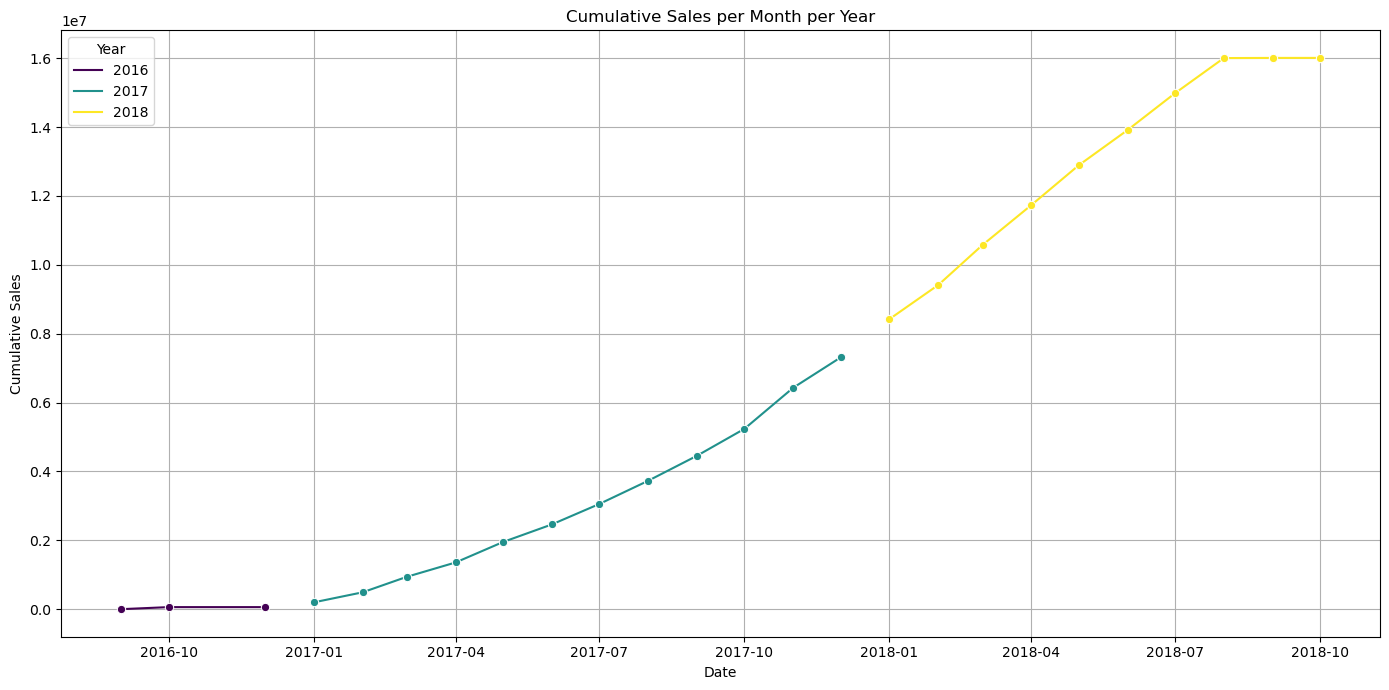

In [97]:
cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data, columns = ["Year","Month","Sales","Cummilative Sales per month per year"])
print(df)
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(14, 7))

sns.lineplot(data=df, x='Date', y='Cummilative Sales per month per year', hue='Year', marker='o', palette='viridis')

plt.title('Cumulative Sales per Month per Year')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.grid(True)
plt.legend(title='Year')

plt.tight_layout()
plt.show()


***Calculate the year-over-year growth rate of total sales***


In [74]:
query = '''


select order_year,pay_sum,previous_sum,((pay_sum-previous_sum)/previous_sum)*100 growth_rate from (select order_year,pay_sum,lag(pay_sum,1) over (order by order_year) previous_sum from (select year(orders.order_purchase_timestamp) order_year, sum(payments.payment_value) pay_sum from orders join payments on orders.order_id = payments.order_id group by order_year order by order_year) alias_subquery) as lag_table


'''

In [75]:
cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data, columns = ["Year","Sales","Previous Sum","Growth Rate (%)"])
df

,Year,Sales,Previous Sum,Growth Rate (%)
0,2016,5.936234e+04,NaN,NaN
1,2017,7.249747e+06,5.936234e+04,12112.703760
2,2018,8.699763e+06,7.249747e+06,20.000924


***Count the number of orders placed in 2017***

In [76]:
query = '''

Select count(order_id) from orders where order_purchase_timestamp like '2017%'

'''

In [77]:
cursor.execute(query)
data = cursor.fetchall()

print(data[0][0])

45101


**Result:<br>There are 45101 orders that were placed in 2017**

***Calculate the percentage of orders that were paid in installments.***


In [78]:
query = '''

select
round(count(case when payment_installments > 1 then order_id end)*100/count(*),2) as percentage from payments

'''

In [79]:
cursor.execute(query)
data = cursor.fetchall()

print(data)

[(Decimal('49.42'),)]


**Result:<br>49.42 Percent of orders were paid in installments.**

***Calculate the percentage of total revenue contributed by each product category.***

In [89]:
query = '''

with payment_sum as (select sum(payment_value) as pay_sum from payments)
Select product_category category,(sum(payment_value)/payment_sum.pay_sum)*100 sales_percentage from order_items o join products p on o.product_id = p.product_id join payments a on o.order_id = a.order_id cross join payment_sum group by category,pay_sum order by sales_percentage desc


'''

               Product_Category  Percentge of Total Revenue
0                bed table bath                   10.697529
1                 HEALTH BEAUTY                   10.352841
2          computer accessories                    9.902824
3          Furniture Decoration                    8.933649
4               Watches present                    8.927654
..                          ...                         ...
69                     PC Gamer                    0.013583
70              House Comfort 2                    0.010685
71               cds music dvds                    0.007492
72  Fashion Children's Clothing                    0.004908
73       insurance and services                    0.002027

[74 rows x 2 columns]


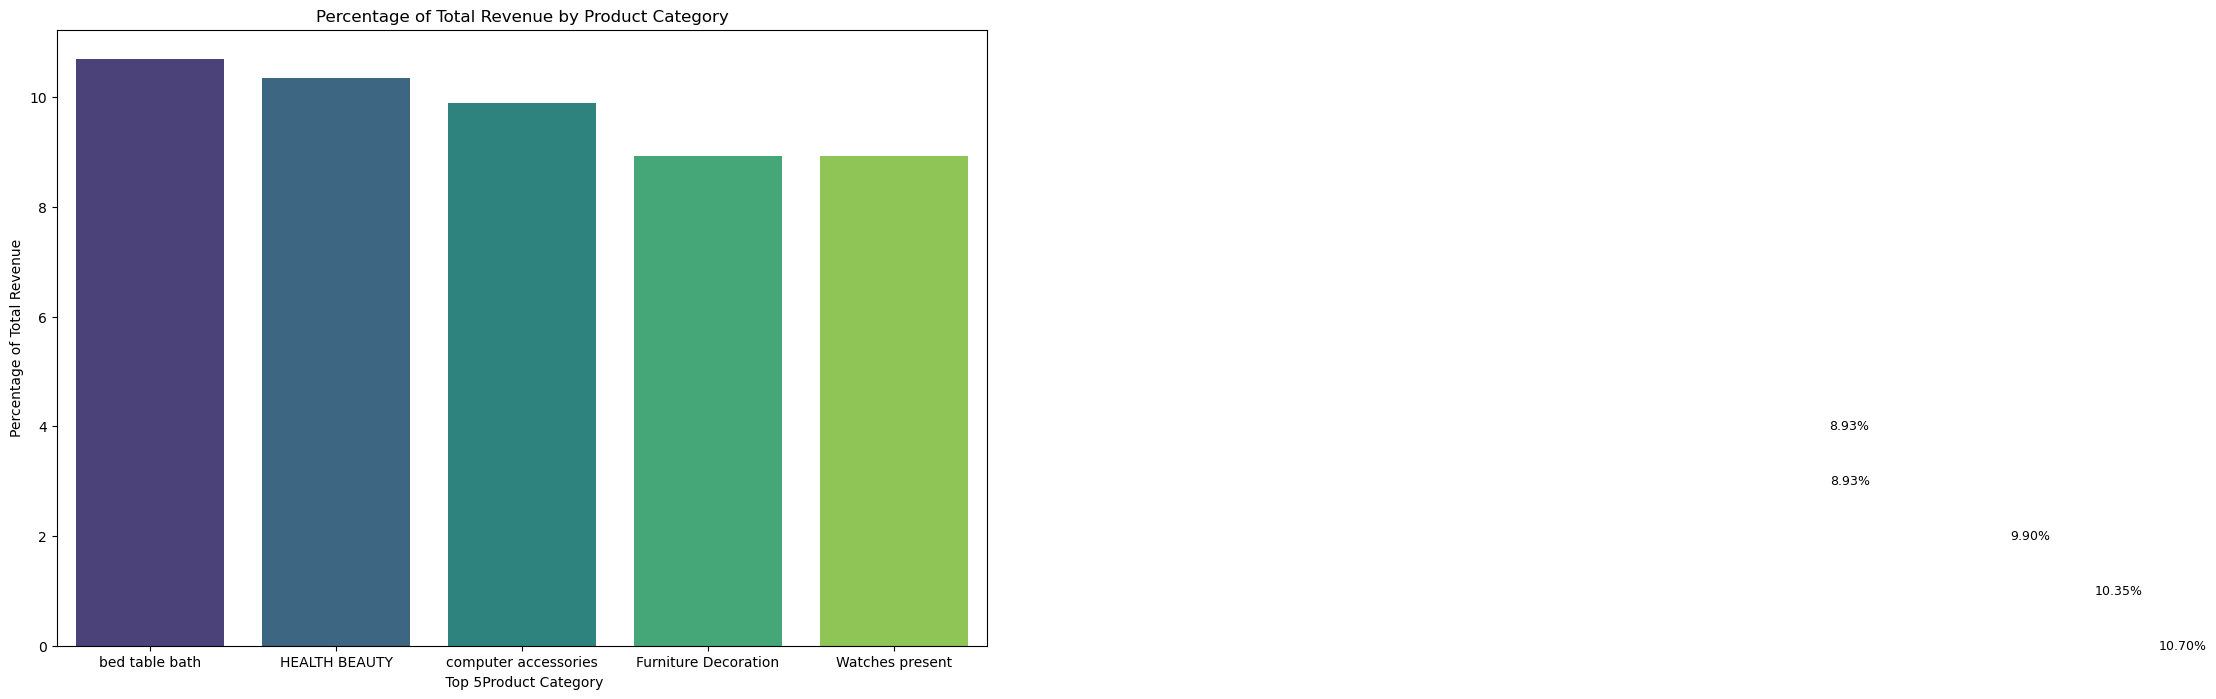

In [90]:
cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data, columns = ["Product_Category","Percentge of Total Revenue"])
print(df)
df = df.head()
plt.figure(figsize=(12, 8))
sns.barplot(x='Product_Category', y='Percentge of Total Revenue', data=df, palette='viridis')

for index, value in enumerate(df['Percentge of Total Revenue']):
    plt.text(value + 0.1, index, f'{value:.2f}%', va='center', fontsize=9)

plt.title('Percentage of Total Revenue by Product Category')
plt.ylabel('Percentage of Total Revenue')
plt.xlabel(' Top 5Product Category')

plt.show()

